<h1><center>Actividad</center></h1>
<h2><center>Información de una base de datos</center></h2>
<h3><center>Juan Manuel Aviña Muñoz</center></h3>

# Importar librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm

# Cargar la base de datos

In [3]:
data = pd.read_csv("/home/jxn/Documents/UAQ/3er_semestre/Machine_Learning/DB/Stars.csv")

print(data)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


In [4]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [5]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
data.corr()

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.676845
R,0.064216,0.526516,1.000000,-0.608728,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Type,0.411129,0.676845,0.660975,-0.955276,1.000000


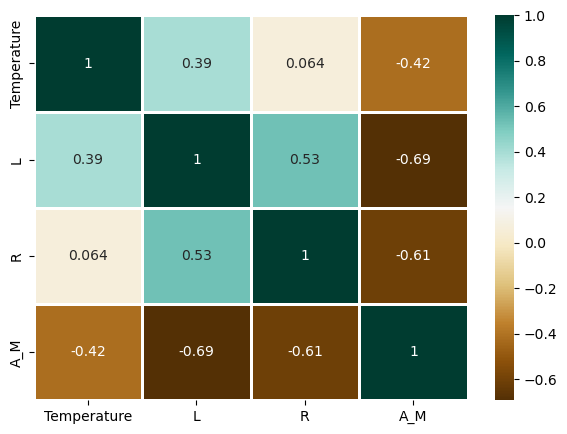

In [23]:
plt.figure(figsize = (7, 5))

sns.heatmap(data.corr(), annot = True, linewidths = 1, cmap="BrBG")
plt.show()

In [8]:
data.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [9]:
data.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

In [10]:
data.replace({'Blue-White': 'Blue-white'}, regex=True,inplace=True)
data.replace({'Blue White': 'Blue-white'}, regex=True,inplace=True)
data.replace({'Blue white': 'Blue-white'}, regex=True,inplace=True)
data.replace({'yellowish': 'yellow-white'}, regex=True,inplace=True)
data.replace({'Yellowish': 'yellow-white'}, regex=True,inplace=True)
data.replace({'Yellowish White': 'yellow-white'}, regex=True,inplace=True)
data.replace({'White': 'white'}, regex=True,inplace=True)
data.replace({'Whitish': 'white'}, regex=True,inplace=True)
data.replace({'Orange-Red': 'Orange'}, regex=True,inplace=True)
data.replace({'Pale yellow orange': 'Orange'}, regex=True,inplace=True)
data.replace({'yellow-white white': 'yellow-white'}, regex=True,inplace=True)
data.replace({'white-Yellow': 'yellow-white'}, regex=True,inplace=True)

data.Color.value_counts()

Red             112
Blue             56
Blue-white       41
yellow-white     15
white            12
Orange            4
Name: Color, dtype: int64

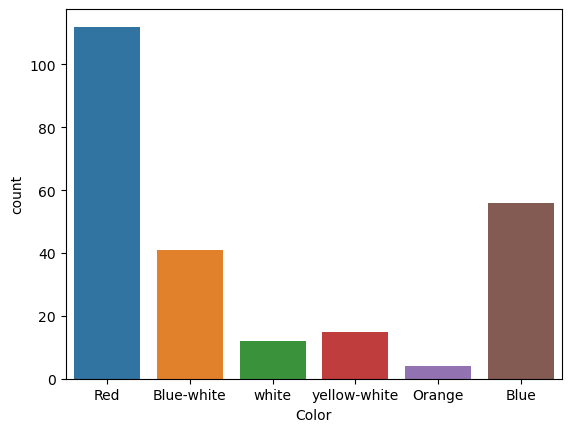

In [11]:
sns.countplot(x=data.Color);

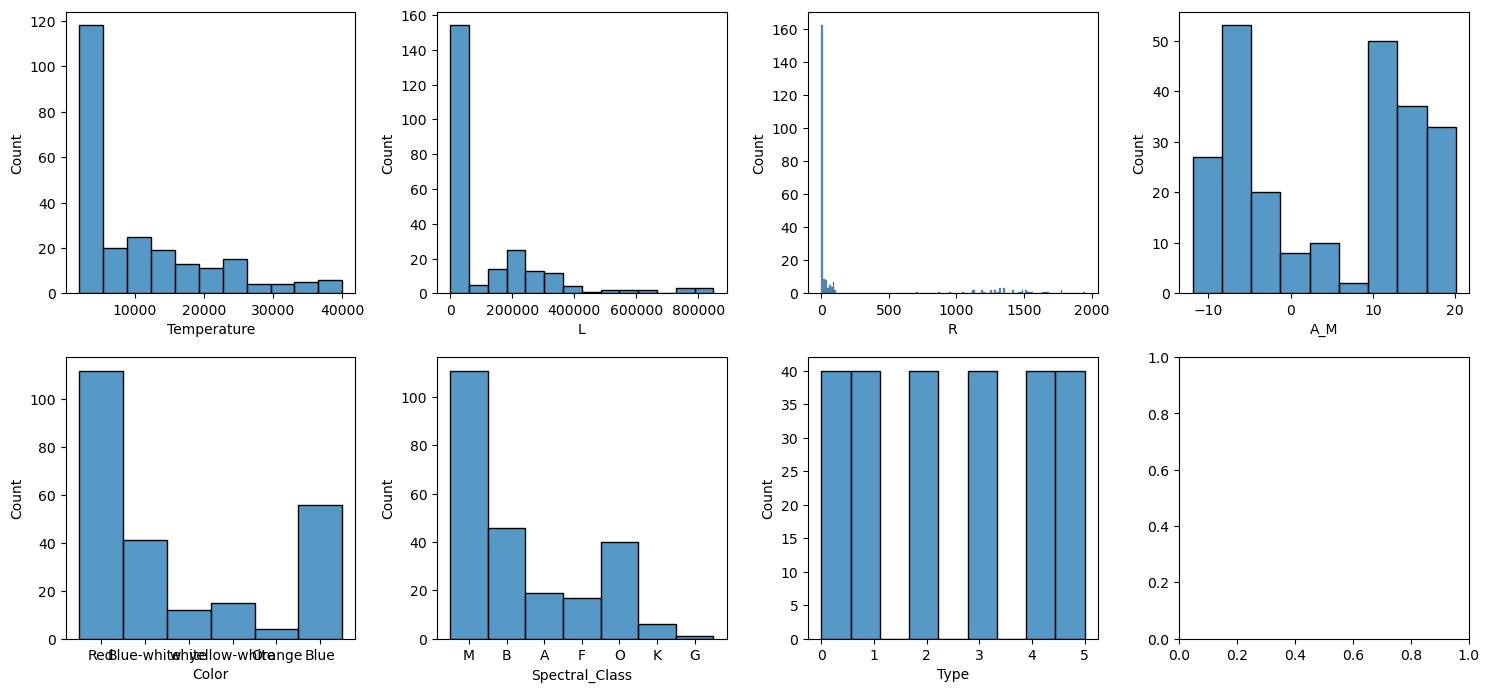

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,7))
axes = axes.flatten()

# Create a histplot for each column in the DataFrame
for ax, col in zip(axes, data.columns):
    sns.histplot(data=data, x=col, ax=ax)
plt.tight_layout()
plt.show()

In [13]:
mydict = {0:"Red Dwarf",1: "Brown Dwarf", 2: "White Dwarf", 3: "Main Sequence"
          , 4: "Super Giants", 5: "Hyper Giants"}
for i in tqdm(range(len(mydict.keys()))):
    data["Type"]=data["Type"].replace(i,mydict[i])
data.head()

100%|██████████| 6/6 [00:00<00:00, 2510.06it/s]


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


In [14]:
y=data["R"]
x=data["Temperature"]
fig = px.scatter(x=x, y=y ,color=data["Type"], labels={
                     'x': "Temperature",
                     'y': "Radius",
                     'color':'Star Type'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Plot showing temperature and radius')
fig.show()

In [15]:
y=data["L"]
x=data["Temperature"]
fig = px.scatter(x=x, y=y ,color=data["Type"], labels={
                     'x': "Temperature",
                     'y': "Luminosity",
                     'color':'Star Type'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Plot showing temperature and Luminosity')
fig.show()

In [16]:
y=data["L"]
x=data["R"]
fig = px.scatter(x=x, y=y ,color=data["Type"], labels={
                     'x': "Radius",
                     'y': "Luminosity",
                     'color':'Star Type'
                     
                 }, template = 'plotly_dark')
fig.update_layout(title='Plot showing radius and Luminosity')
fig.show()

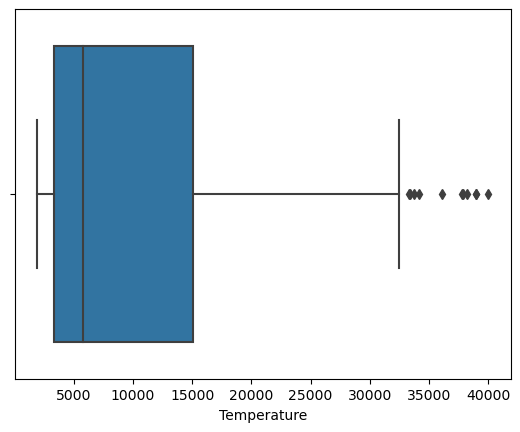

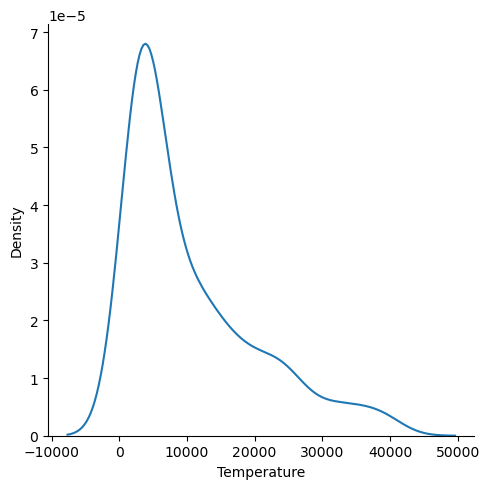

In [17]:
sns.boxplot( x=data["Temperature"])
sns.displot(x=data.Temperature,kind="kde")

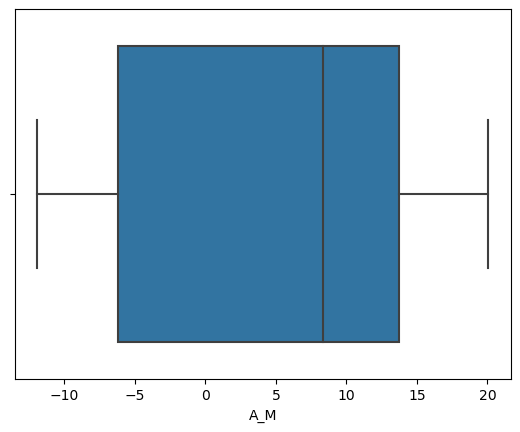

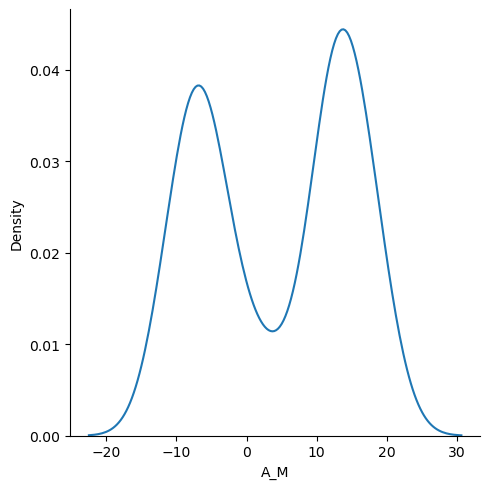

In [18]:
sns.boxplot( x=data["A_M"])
sns.displot(x=data.A_M,kind="kde")

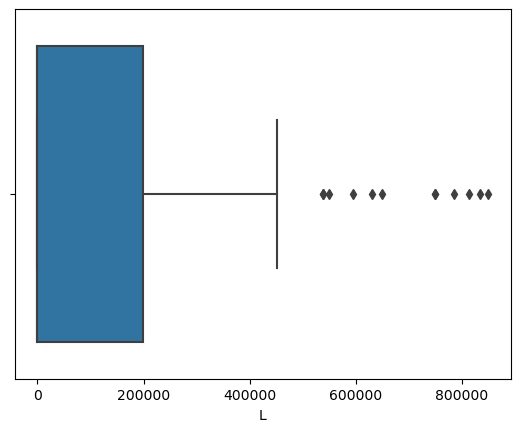

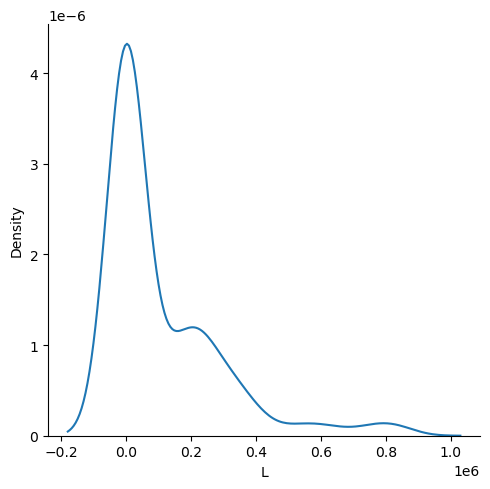

In [19]:
sns.boxplot( x=data["L"])
sns.displot(x=data.L,kind="kde")

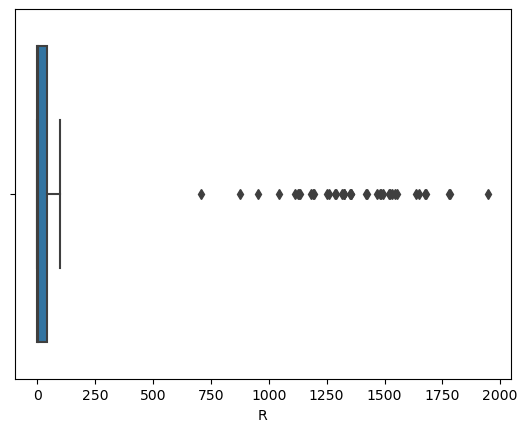

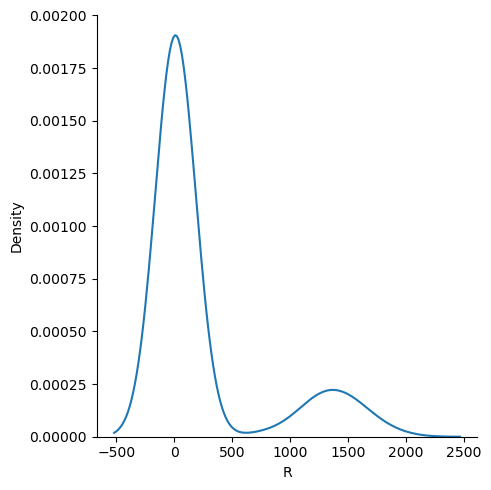

In [20]:
sns.boxplot( x=data["R"])
sns.displot(x=data.R,kind="kde")